In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [7]:
import datetime
 #Import data
nasa = pd.read_csv("./data/nasa_facebook_statuses.csv",
                   usecols=["status_published","num_reactions","num_comments",
                            "num_shares","num_likes"])
#Convert column type to date time 
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
#Add column with day only
nasa['month'] = nasa.apply(lambda row: row["status_published"].month,axis=1)
#Group all columns by sum
nasa_by_month = nasa.groupby(by='month').sum()
nasa_by_month.head()

num_reactions  num_comments  num_shares  num_likes
month                                                    
3            3003815         49108      392585    2846361
4            2927616        120118      370803    2760385
5            2708977         46122      393576    2548960

<AxesSubplot:ylabel='num_likes'>

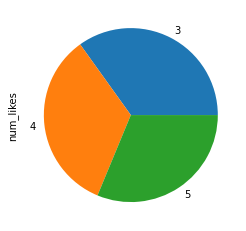

In [8]:
nasa_by_month["num_likes"].plot(kind="pie")

<AxesSubplot:ylabel='num_likes'>

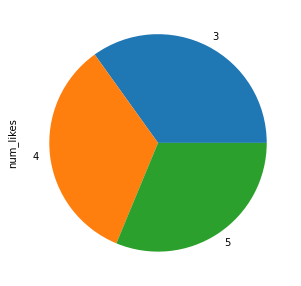

In [9]:
nasa_by_month["num_likes"].plot(kind="pie", figsize=(5,5))

<AxesSubplot:title={'center':'NASA Facebook activity'}, ylabel='num_likes'>

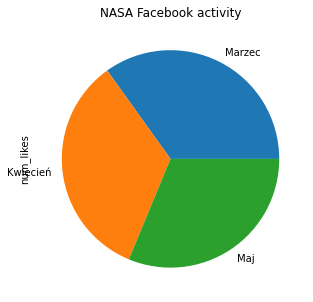

In [10]:
nasa_by_month["num_likes"].plot(kind="pie", figsize=(5,5),title="NASA Facebook activity",
                                labels=["Marzec","Kwiecień","Maj"])

array([[<AxesSubplot:ylabel='num_reactions'>,
        <AxesSubplot:ylabel='num_comments'>],
       [<AxesSubplot:ylabel='num_shares'>,
        <AxesSubplot:ylabel='num_likes'>]], dtype=object)

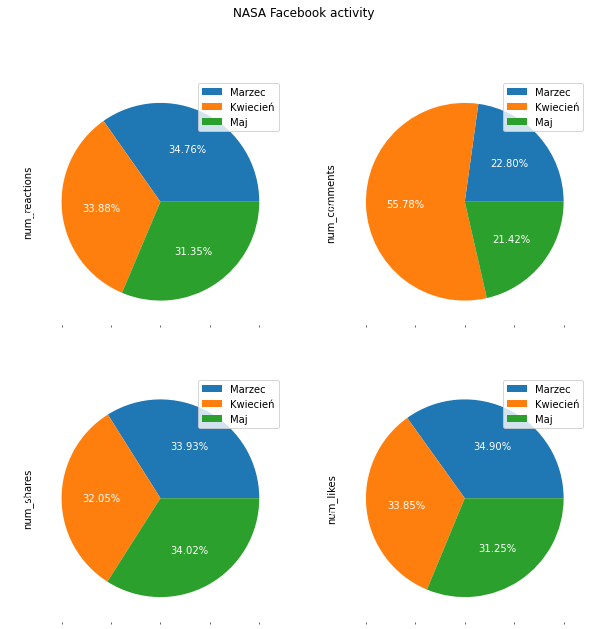

In [22]:
nasa_by_month.plot(kind="pie", figsize=(10,10),subplots=True,title="NASA Facebook activity",
                                labels=["Marzec","Kwiecień","Maj"],layout=(2,2), autopct="%.2f%%",
                  textprops=dict(color="w"))